In [49]:
import yfinance as yf 
import pandas as pd 
import os 
from data_loader import * 

# top 20 SP500 stocks  
tickers = [
    'AAPL',   # Apple Inc.
    'MSFT',   # Microsoft Corporation
    'GOOGL',  # Alphabet Inc. (Google)
    'AMZN',   # Amazon.com Inc.
    'NVDA',   # NVIDIA Corporation
    'META',   # Meta Platforms Inc. (Facebook)
    'TSLA',   # Tesla Inc.
    'NFLX',   # Netflix Inc.
    'UNH',    # UnitedHealth Group Inc.
    'JNJ',    # Johnson & Johnson
    'V',      # Visa Inc.
    'JPM',    # JPMorgan Chase & Co.
    'WMT',    # Walmart Inc.
    'MA',     # Mastercard Inc.
    'PG',     # Procter & Gamble Co.
    'HD',     # The Home Depot Inc.
    'DIS',    # The Walt Disney Company
    'BAC',    # Bank of America Corp.
    'XOM',    # Exxon Mobil Corporation
    'CVX'     # Chevron Corporation
]

stock_data = get_data(tickers) 

# Remember to create your own data folder first
for ticker, df in stock_data.items():  
    if not os.path.exists(f'data/{ticker}.csv'):
        df.to_csv(f'data/{ticker}.csv')  



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [50]:
# Get the data from the CSV files
stock_data = {}
for ticker in tickers:
    df = pd.read_csv(f'data/{ticker}.csv', skiprows=2, index_col='Date', parse_dates=True)
    # Rename the first column to 'Date' if needed and set proper column names
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    stock_data[ticker] = df


In [51]:
stock_data = process_data_with_indicators(stock_data)
stock_data['AAPL'].loc['2024-01-01':'2026-01-01']

,Open,High,Low,Close,Volume,RSI,Upper_BB,Lower_BB,EMA12,EMA26,MACD,RVOL
Date,,,,,,,,,,,,
2024-01-02,183.903229,186.677036,182.169601,185.399096,82488700,35.645413,197.515438,186.955635,191.426018,190.244222,1.181796,1.499842
2024-01-03,182.526245,184.141000,181.713909,182.496527,58414500,31.276424,198.589402,185.311063,190.052250,189.670318,0.381932,1.047803
2024-01-04,180.208130,181.377083,179.187767,180.445875,71983600,22.723445,199.837289,183.264717,188.574346,188.987026,-0.412680,1.285025
2024-01-05,179.484955,181.050175,178.484409,180.287390,62379700,11.742149,200.604538,181.263127,187.299430,188.342609,-1.043179,1.092813
2024-01-08,183.823975,183.863609,179.801961,180.386437,59144500,12.451200,201.104792,179.619669,186.235892,187.753263,-1.517370,1.025655
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600,28.864115,285.728362,268.960640,274.381781,274.017058,0.364722,0.405481
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800,37.768404,285.708055,268.700948,274.347661,274.027647,0.320014,0.493893
2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200,39.180590,285.715601,268.236401,274.092637,273.928562,0.164075,0.542002


In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
# Plot all tickers 
plt.figure(figsize=(16, 10))
for ticker in stock_data.keys(): 
    plt_data = stock_data[ticker].loc['2024-01-01':'2025-01-01']
    plt.plot(plt_data.index, plt_data['Close'], label=ticker)
plt.legend()    
plt.show()

array([<Axes: title={'center': 'AAPL - Trading Chart'}, ylabel='Price'>,
       <Axes: ylabel='RSI'>, <Axes: ylabel='MACD'>,
       <Axes: xlabel='Date', ylabel='Relative Volume'>], dtype=object)

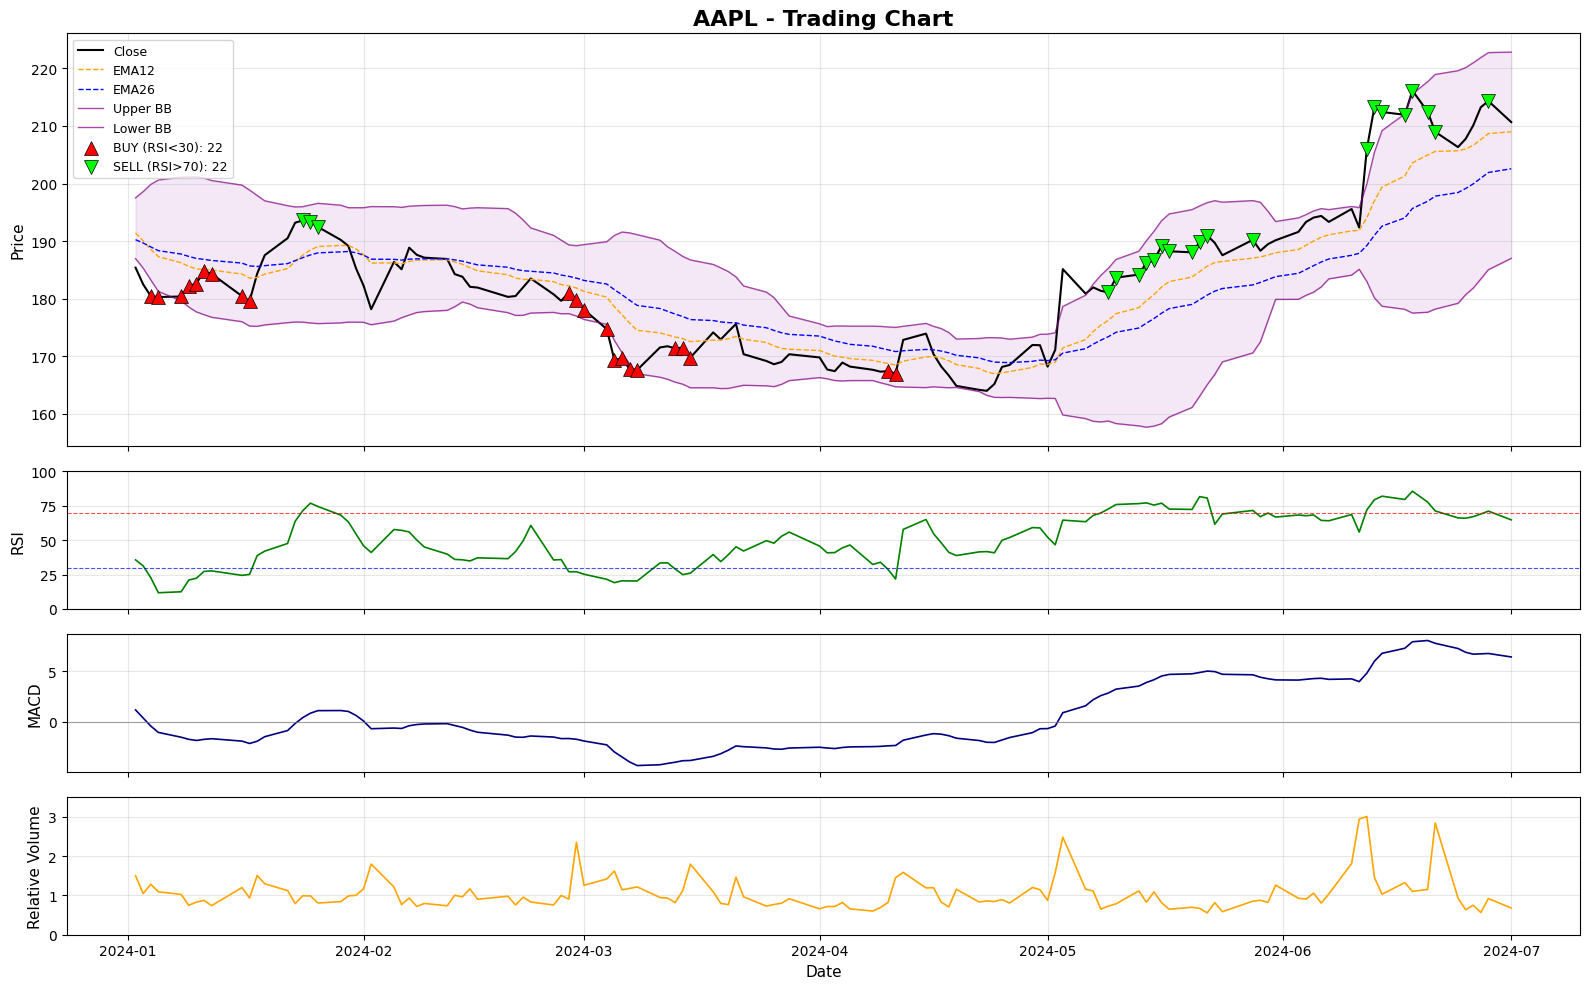

In [53]:
def plot_trading_chart(df, ticker, indicators, start_date=None, end_date=None):
    if start_date:
        df = df.loc[start_date:]
    if end_date:
        df = df.loc[:end_date]
    
    # Number of subplots: 1 for price + 1 for each indicator
    n_plots = 1 + len(indicators)
    height_ratios = [3] + [1] * len(indicators)
    
    fig, axes = plt.subplots(n_plots, 1, figsize=(16, 4 + 2*len(indicators)), height_ratios=height_ratios, sharex=True)
    
    # Plot 1: Price with EMAs and Bollinger Bands
    ax_price = axes[0]
    ax_price.plot(df.index, df['Close'], label='Close', color='black', linewidth=1.5)
    ax_price.plot(df.index, df['EMA12'], label='EMA12', color='orange', linewidth=1, linestyle='--')
    ax_price.plot(df.index, df['EMA26'], label='EMA26', color='blue', linewidth=1, linestyle='--')
    
    ax_price.plot(df.index, df['Upper_BB'], label='Upper BB', color='purple', linewidth=1, linestyle='-', alpha=0.7)
    ax_price.plot(df.index, df['Lower_BB'], label='Lower BB', color='purple', linewidth=1, linestyle='-', alpha=0.7)
    ax_price.fill_between(df.index, df['Lower_BB'], df['Upper_BB'], alpha=0.1, color='#9c27b0')
    
    # RSI < 30: Buy signals
    # RSI > 70: Sell signals
    buy_signals = df[df['RSI'] < 30]
    sell_signals = df[df['RSI'] > 70]
    
    # Buy signals: Green triangles
    ax_price.scatter(buy_signals.index, buy_signals['Close'], 
               marker='^', s=100, color='red', label=f'BUY (RSI<30): {len(buy_signals)}',
               edgecolors='black', linewidths=0.5, zorder=5)
    
    # Sell signals: Red triangles
    ax_price.scatter(sell_signals.index, sell_signals['Close'], 
               marker='v', s=100, color='lime', label=f'SELL (RSI>70): {len(sell_signals)}',
               edgecolors='black', linewidths=0.5, zorder=5)
    
    # Plot 2: RSI
    ax_rsi = axes[1]
    ax_rsi.plot(df.index, df['RSI'], color='green', linewidth=1.2)
    ax_rsi.set_ylabel('RSI', fontsize=11)
    # RSI levels (Upper and Lower)
    ax_rsi.axhline(y=70, color='red', linestyle='--', linewidth=0.8, alpha=0.7)
    ax_rsi.axhline(y=30, color='blue', linestyle='--', linewidth=0.8, alpha=0.7)
    ax_rsi.set_ylim(0, 100)
    ax_rsi.grid(alpha=0.3)
    
    # Plot 3: MACD
    ax_macd = axes[2]
    ax_macd.plot(df.index, df['MACD'], color='navy', linewidth=1.2)
    ax_macd.set_ylabel('MACD', fontsize=11)
    ax_macd.axhline(y=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.7)
    ax_macd.grid(alpha=0.3)
    
    ax_price.set_ylabel('Price', fontsize=11)
    ax_price.legend(loc='upper left', fontsize=9)
    ax_price.set_title(f'{ticker} - Trading Chart', fontsize=16, fontweight='bold')
    ax_price.grid(alpha=0.3)

    # Plot 4: Relative Volume
    ax_rv = axes[3]
    ax_rv.plot(df.index, df['RVOL'], color='orange', linewidth=1.2)
    ax_rv.set_ylabel('Relative Volume', fontsize=11)
    ax_rv.set_ylim(0, 3.5)
    ax_rv.grid(alpha=0.3)
    ax_rv.set_xlabel('Date', fontsize=11)
    ax_rv.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.tight_layout()
    return axes


plot_trading_chart(stock_data['AAPL'], 'AAPL', indicators=['RSI', 'MACD', 'RVOL'], start_date='2024-01-01', end_date='2024-07-01')